# Binary ANN
- The goal is to construct a PyTorch model to classify data based on colors

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from IPython import display as dp
import sympy as sym
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

"""
Binary classification with PyTorch ANN.

Creates two 2D Gaussian clusters (class A at (1,1), class B at (5,1)) and trains
a small feedforward net (2→1→1 with ReLU and Sigmoid) to classify points by color.
Uses BCE loss and a 0.5 threshold to assign predicted labels.

Components:
- Data: 100 points per class, blurred by a configurable factor
- Model: Linear(2,1) → ReLU → Linear(1,1) → Sigmoid
- Loss: BCELoss
- Output: probability of class 1; predlabels = predictions > 0.5
- Accuracy: 100 - 100*len(misclassified)/(2*nPerClust)
"""

'\nBinary classification with PyTorch ANN.\n\nCreates two 2D Gaussian clusters (class A at (1,1), class B at (5,1)) and trains\na small feedforward net (2→1→1 with ReLU and Sigmoid) to classify points by color.\nUses BCE loss and a 0.5 threshold to assign predicted labels.\n\nComponents:\n- Data: 100 points per class, blurred by a configurable factor\n- Model: Linear(2,1) → ReLU → Linear(1,1) → Sigmoid\n- Loss: BCELoss\n- Output: probability of class 1; predlabels = predictions > 0.5\n- Accuracy: 100 - 100*len(misclassified)/(2*nPerClust)\n'

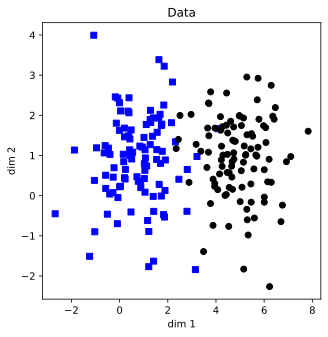

In [ ]:
# Creating The Data:
nPerClust = 100
blur = 1        # How spread out the data will be
A = [1, 1]      # Centering Data A around coord- (1,1)
B = [5, 1]      # Centering Data B around coord- (5,1)

# Generating Data:
# 'a' and 'b' are lists of 2 arrays. One for abscissa and another for ordinate
# The coordinates are randomly scattered by the factor "blur"
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

# True Labels
# Vertically stacking data labels fo A and B
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# Concatanate into a Matrix:
# A 200x2 matrix is generated. Col 1 abscissa and Col 2 ordinate
# 0:99 Data "a" // 100:199 Data "b"
data_np= np.hstack((a, b)).T

# Convert to Tensors:
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Showing the true data:
fig = plt.figure(figsize=(5, 5))

# Plotting the first 100 points as blue squares in the left half of the plane:
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')

# Plotting the second 100 points as black circles in the right half of the plane:
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')

plt.title('Data')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.show()

In [ ]:
# Building the Model
ANNclassify = nn.Sequential(
    nn.Linear(2, 1),     # Input layer (2 input, 1 output)
    nn.ReLU(),           # Activation Function
    nn.Linear(1, 1),     # Output Unit
    nn.Sigmoid()         # Final Activation Unit
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
# Learning Rate
learningRate = 0.01

# Loss Function
lossFunction = nn.BCELoss()       # Binary Cross Entropy loss

# Optimizer (Implementing Gradient Descent)
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

In [ ]:
# Training The Model:
numepochs = 1000

losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # Forward pass
  y_hat = ANNclassify(data)

  # Computing the loss
  loss = lossFunction(y_hat, labels)
  losses[epochi] = loss.item()

  # Backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

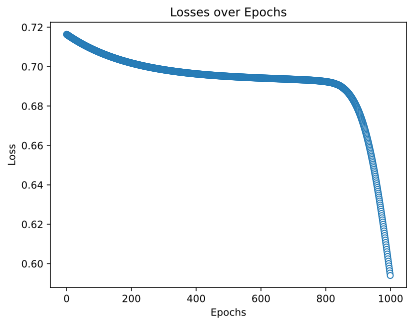

In [ ]:
# Plotting the Losses:

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses over Epochs')
plt.show()

In [ ]:
# Computing Predictions:
predictions = ANNclassify(data)     # Result of Sigmoid function y_hat

predlabels = predictions>0.5

# Find Errors
misclassified = np.where(predlabels != labels)[0]

# Total Accuracy:
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)

print('Final Accuracy: %g%%' %totalacc)

Final Accuracy: 85%


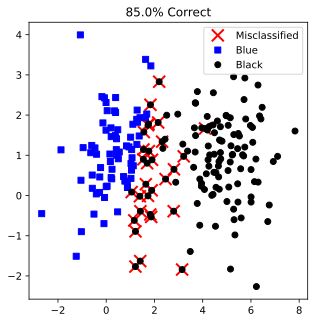

In [ ]:
# Plot the Labeled Data:
fig = plt.figure(figsize=(5, 5))
plt.plot(data[misclassified,0], data[misclassified,1],'rx',markersize=12, markeredgewidth=2.0)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')

plt.legend(['Misclassified', 'Blue', 'Black'])
plt.title(f'{totalacc}% Correct')
plt.show()

## Observations

- The model learns a decision boundary that separates the two clusters in 2D. With one hidden unit (2→1→1), the boundary is piecewise linear; with more hidden units it can approximate a more complex curve.
- Final accuracy depends on how well the classes are separated (blur), the learning rate, and the random initialization. Blur ≈ 1 often gives good separation; larger blur makes the task harder.
- When accuracy is around 50%, the model is effectively predicting a single class for all samples. This can happen when the single ReLU gets stuck or the initialization is poor. Using more hidden units (e.g. 2→8→1) usually improves stability.
- BCE loss decreases when predictions match labels; a plateau near a low value corresponds to a good fit. If the loss stays high or oscillates, training may need more epochs, a different learning rate, or a richer model.
- Misclassified points (red X’s) are usually near the decision boundary, where the two classes overlap.